<a href="https://colab.research.google.com/github/kunal-git-002/facial-landmarks/blob/master/pt4_draw_lines_using_face_landmarks_for_multiple_persons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pt4 -face landmark detection using dllib & draw lines

>detect 68 landmarks


> for multiple person









In [ ]:
import dlib
import cv2
import numpy as np

from google.colab.patches import cv2_imshow 

In [ ]:
img=cv2.imread("/content/drive/My Drive/face landmarks/sample imgs/rock2.jpg")
h,w,ch=img.shape

#img=cv2.resize(img,(int(w/2),int(h/2)))
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

cv2_imshow(img)

***all 68 landmarks***
[https://www.google.com/search?q=face+landmarks&tbm=isch&chips=q:face+landmarks,g_1:dlib:kq1U2Cf0vHw%3D&hl=en&sa=X&ved=2ahUKEwijgIz7pK7rAhWMKrcAHYeLCYUQ4lYoAHoECAEQFA&biw=1349&bih=608#imgrc=yeJhsrkezc3dgM](https://www.google.com/search?q=face+landmarks&tbm=isch&chips=q:face+landmarks,g_1:dlib:kq1U2Cf0vHw%3D&hl=en&sa=X&ved=2ahUKEwijgIz7pK7rAhWMKrcAHYeLCYUQ4lYoAHoECAEQFA&biw=1349&bih=608#imgrc=yeJhsrkezc3dgM)

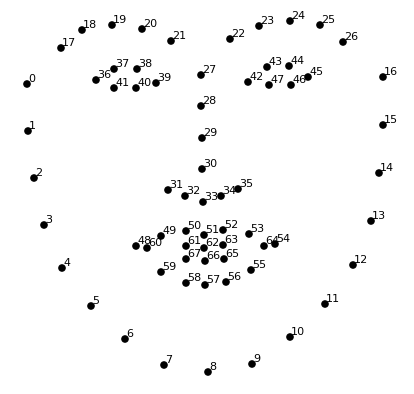

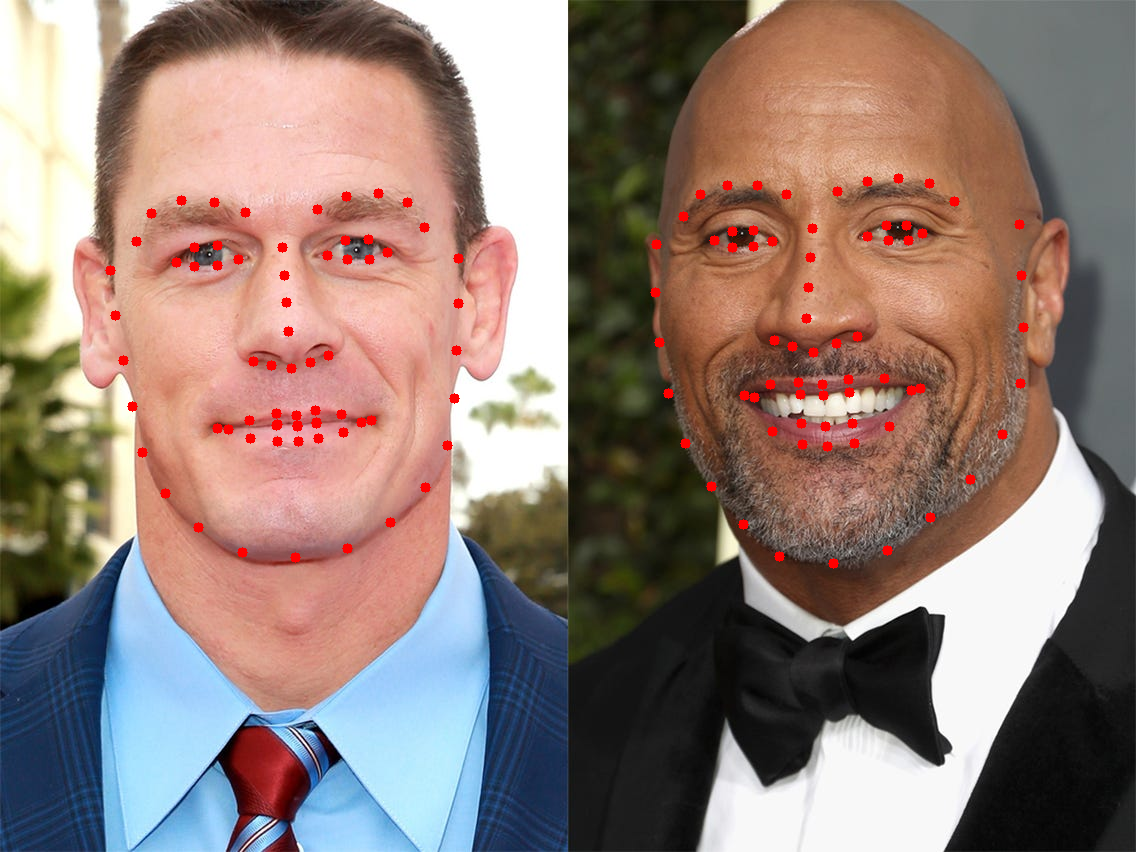

In [83]:
#
detector=dlib.get_frontal_face_detector()
predictor=dlib.shape_predictor("/content/drive/My Drive/face landmarks/methods (fr,dllib)/dlib/shape_predictor_68_face_landmarks.dat")

#detect the faces
faces=detector(gray)
num_of_persons=len(faces)

#landmarks points for all faces present in image
all_persons_landmarks={}#for draw a line

for ind in range(num_of_persons):
  #landmark detection 
  face=faces[ind]
  landmarks_points=[]
  landmarks=predictor(gray,face)

  for i in range(0,68):

    x=landmarks.part(i).x
    y=landmarks.part(i).y 

    landmarks_points.append((x,y))
    #draw circle on landmark
    cv2.circle(img,(x,y),5,(0,0,255),-1)
  
  all_persons_landmarks["person_"+str(ind)]=landmarks_points
cv2_imshow(img)


draw a line using landmarks

> 0-16 left to right 

> 17-21 right eyebrow

> 22-26 left eyebrow

> 27-30 , 31-35 nose

> 36-41 right eye

> 42-47 left eye

> 48-59 outer perimiti of both upper & lower lips

> 60-67 inner perimit of both upper & lower lips

















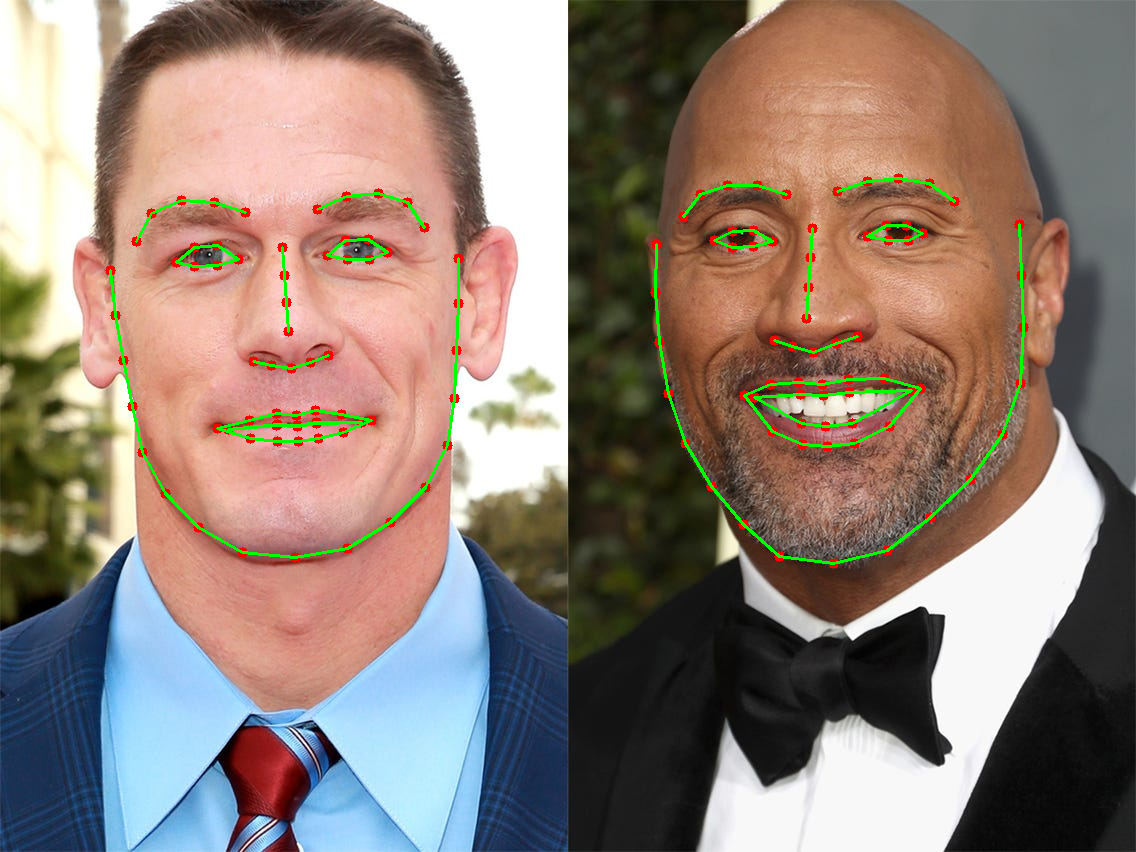

In [84]:

col=(0,255,0)
th=2

#landmarks_points

fm=img
for single_person_landmarks in all_persons_landmarks.values():
  landmarks_points=single_person_landmarks
  for i in range(68):

    if i<16:
      cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    #righht eyebrow
    elif 17<=i<21:
      cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    #left eyebrow
    elif 22<=i<26:
      cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    #nose
    elif 27<=i<30:
      cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    elif 31<=i<35:
      cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    #r eye
    elif 36<=i<=41:
      if i==41:
        cv2.line(fm,landmarks_points[i],landmarks_points[36],col,th)
      
      else:
        cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)


    #l eye
    elif 42<=i<=47:
      if i==47:
        cv2.line(fm,landmarks_points[i],landmarks_points[42],col,th)
      
      else:
        cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    #outer
    elif 48<=i<=59:
      if i==59:
        cv2.line(fm,landmarks_points[i],landmarks_points[48],col,th)
      
      else:
        cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    #inner
    elif 60<=i<=67:
      if i==67:
        cv2.line(fm,landmarks_points[i],landmarks_points[60],col,th)
      
      else:
        cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    
cv2_imshow(img)



***showing only landmarks & lines into black frame or white frame***

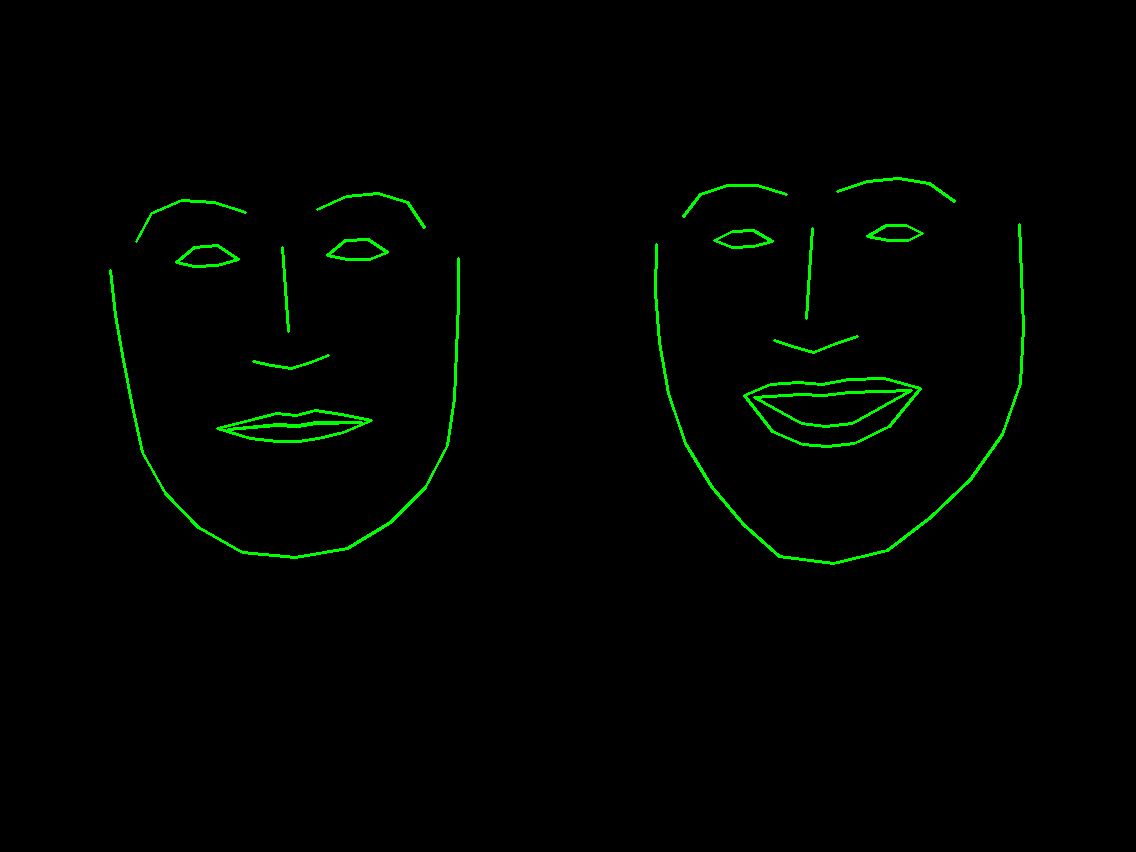

In [87]:
black_frame=np.zeros(shape=img.shape,dtype=np.uint8)#black frame
white_frame=np.full(shape=img.shape,fill_value=255,dtype=np.uint8)#white frame

fm=black_frame

for single_person_landmarks in all_persons_landmarks.values():
  landmarks_points=single_person_landmarks
  for i in range(68):

    if i<16:
      cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    #righht eyebrow
    elif 17<=i<21:
      cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    #left eyebrow
    elif 22<=i<26:
      cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    #nose
    elif 27<=i<30:
      cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    elif 31<=i<35:
      cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    #r eye
    elif 36<=i<=41:
      if i==41:
        cv2.line(fm,landmarks_points[i],landmarks_points[36],col,th)
      
      else:
        cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)


    #l eye
    elif 42<=i<=47:
      if i==47:
        cv2.line(fm,landmarks_points[i],landmarks_points[42],col,th)
      
      else:
        cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    #outer
    elif 48<=i<=59:
      if i==59:
        cv2.line(fm,landmarks_points[i],landmarks_points[48],col,th)
      
      else:
        cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    #inner
    elif 60<=i<=67:
      if i==67:
        cv2.line(fm,landmarks_points[i],landmarks_points[60],col,th)
      
      else:
        cv2.line(fm,landmarks_points[i],landmarks_points[i+1],col,th)

    
cv2_imshow(fm)